In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', grid=False, ticks=True)

In [4]:
df = pd.read_csv('houseprices.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [5]:
df.shape[0]

20

In [6]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis=1))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [7]:
scaled_x
scaled_y

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

$$MSE:\epsilon = \sum_{i=1}^{n}\frac{(Y_i-\hat{Y_i})^2}{n}$$
$$\epsilon = \frac{1}{n}\sum_{i=1}^{n}{(Y_i-(wX_i+b))^2}$$
$$\frac{\partial{\epsilon}}{\partial{w}} = -\frac{2}{n}\sum_{i=1}^{n}{X_i(Y_i-(wX_i+b))}$$
$$\boxed{\frac{\partial{\epsilon}}{\partial{w}} = -\frac{2}{n}\sum_{i=1}^{n}{X_i(Y_i-\hat{Y_i})}}$$
$$In\space matrix\space form: \boxed{\frac{\partial{\epsilon}}{\partial{w}} = -\frac{2}{n}{X}\cdot{(Y_{true}-Y_{pred})}}$$
$$\frac{\partial{\epsilon}}{\partial{b}} = -\frac{2}{n}\sum_{i=1}^{n}{(Y_i-(wX_i+b))}$$
$$\boxed{\frac{\partial{\epsilon}}{\partial{b}} = -\frac{2}{n}\sum_{i=1}^{n}{(Y_i-\hat{Y_i}))}}$$

In [8]:
def BGD(X, y_true, epochs, lrate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, X.T) + b
        wd = -(2/total_samples)*(X.T.dot(y_true-y_pred))
        bd = -2*np.mean(y_true-y_pred)
        
        w = w - lrate*wd
        b = b - lrate*bd
        
        cost = np.mean(np.square(y_true-y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

In [9]:
scaled_y.reshape(scaled_y.shape[0])

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [10]:
w, b, cost, cost_list, epoch_list = BGD(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)

In [11]:
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Cost')

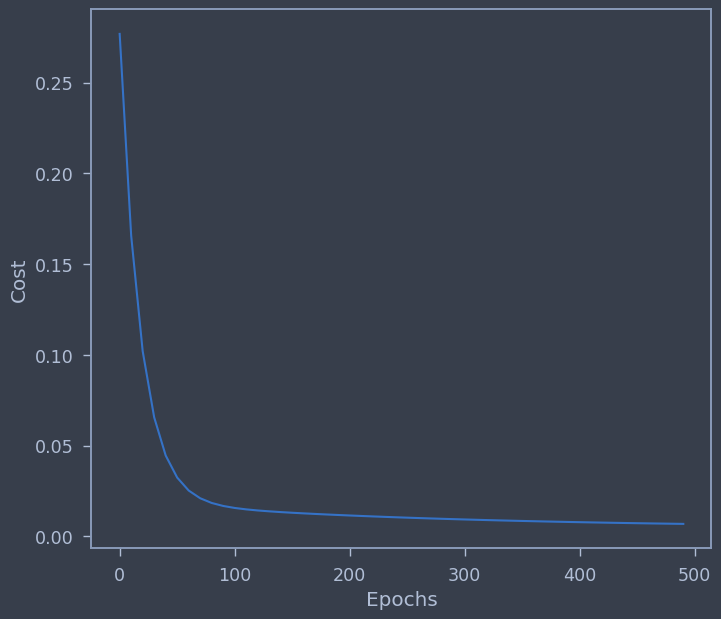

In [12]:
plt.plot(epoch_list,cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [13]:
def predict(area, bedroom, weights, bias):
    scaled_x = sx.transform([[area, bedroom]])[0]
    scaled_price = np.dot(scaled_x, weights) + bias
    price = sy.inverse_transform([[scaled_price]])
    
    return price

In [14]:
predict(df.drop('price', axis=1)['area'][15], df.drop('price', axis=1)['bedrooms'][12], w, b)

/home/shanmukh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[36.01372194]])

In [15]:
predict(1000,3,w,b)

/home/shanmukh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[53.01967221]])

In [16]:
predict(1000,2,w,b)

/home/shanmukh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[30.25309446]])

In [17]:
def SGD(X, y_true, epochs, lrate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        import random
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_pred = np.dot(w, sample_x.T) + b
        wd = -(2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
        bd = -2*np.mean(sample_y-y_pred)
        
        w = w - lrate * wd
        b = b - lrate * bd
        
        cost = np.mean(np.square(sample_y-y_pred))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

In [18]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)

In [19]:
w_sgd, b_sgd, cost_sgd

(array([0.70542965, 0.71218303]), -0.22243770786335673, 7.933899179070053e-05)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Cost')

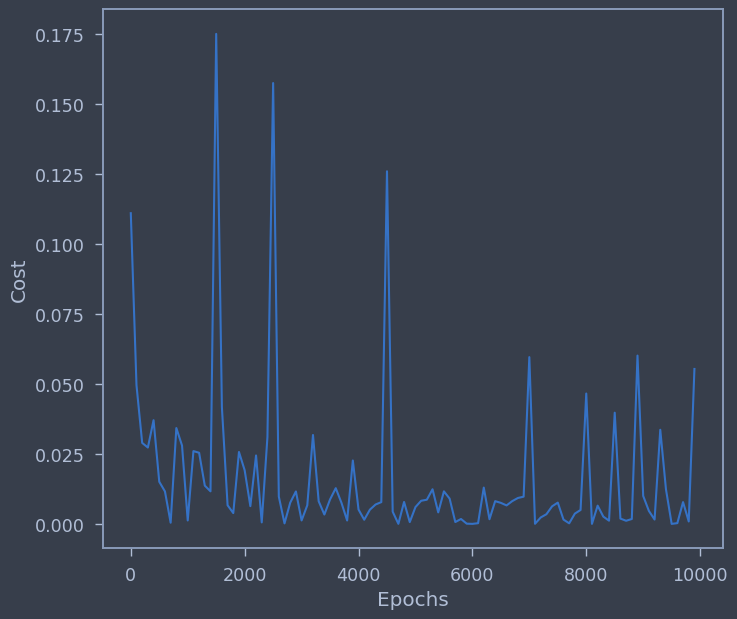

In [20]:
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [21]:
predict(1000,3,w_sgd,b_sgd)

/home/shanmukh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[56.61105756]])

In [22]:
np.random.randint(10, size=10)

array([4, 8, 6, 2, 6, 0, 8, 6, 4, 2])

In [23]:
def MBGD(X, y_true, epochs, lrate=0.01, batch_size = 5):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        sample_x = X[random_indices]
        sample_y = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size):
            Xj = sample_x[j:j+batch_size]
            yj = sample_y[j:j+batch_size]
            
            y_pred = np.dot(w, Xj.T) + b
            wd = -(2/total_samples)*(Xj.T.dot(yj-y_pred))
            bd = -2*np.mean(yj-y_pred)

            w = w - lrate * wd
            b = b - lrate * bd

            cost = np.mean(np.square(yj-y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

In [24]:
w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd = MBGD(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 450)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Cost')

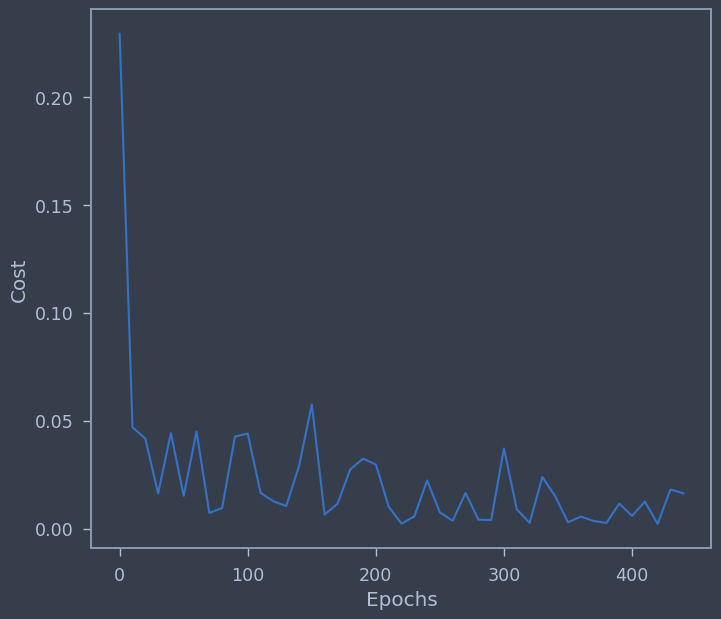

In [25]:
plt.plot(epoch_list_mbgd, cost_list_mbgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [26]:
predict(1000,3,w,b)

/home/shanmukh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[53.01967221]])

In [27]:
predict(1000,3,w_sgd,b_sgd)

/home/shanmukh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[56.61105756]])

In [28]:
predict(1000,3,w_mbgd,b_mbgd)

/home/shanmukh/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[53.3105411]])